In [1]:
library(plyr,ldply)
library(dplyr)
library(plyr,llply)
library(tidyverse)
options(repr.plot.height=4,repr.plot.width=6)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.5
✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ tidyr   1.2.1     ✔ forcats 0.5.2
✔ readr   2.1.3     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::ren

#1
Cargar los datos en un dataframe llamado: airbnb

In [2]:
#1
airbnb <- read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

#2
Mostrar las primeras 6 filas del dataframe

In [6]:
#2
head(airbnb,6)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


#3
Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [7]:
#3
colnames(airbnb) <-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
head(airbnb)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


#4
Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [11]:
#4
feet <- 0.092903
airbnb["MetrosCuadrados"] <- airbnb["PiesCuadrados"]*feet
head(airbnb,1)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA


#5
Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [12]:
#5

airbnb$CodigoPostal <- as.character(airbnb$CodigoPostal)
airbnb$CodigoPostal[airbnb$CodigoPostal=='-']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal==' ']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal==',']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28']<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002 28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051 28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013']<-'28013'
airbnb$CodigoPostal <- as.numeric(airbnb$CodigoPostal)
airbnb$CodigoPostal[airbnb$CodigoPostal < 28000]<-NA




#6
Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [14]:
#6
list6 <- as.data.frame(na.omit(airbnb$CodigoPostal))
colnames(list6) <- c("Codigos Postales")
unique(list6)

,Codigos Postales
,<dbl>
1,28004
5,28015
13,28013
14,28005
18,28012
27,28014
37,28045
142,28007
148,28028


#7
¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [548]:
#7
sort(table(airbnb$CodigoPostal),decreasing=T)[1:5]
sort(table(airbnb$CodigoPostal),decreasing=F)[1:5]


28012 28004 28005 28013 28014 
 2060  1795  1194  1020   630 


28048 28052 28056 28058 28060 
    1     1     1     1     1 

#8
¿Cuales son los barrios que hay en el código postal 28012?


In [15]:
#8
list8 <- airbnb %>% filter(CodigoPostal=="28012")
list8 <- as.data.frame(levels(droplevels(unique(list8$Barrio))))
colnames(list8) <- c("Barrios")
list8

Barrios
<chr>
Acacias
Arapiles
Atocha
Cortes
Delicias
Embajadores
Goya
Palacio
Palos de Moguer


#9 ¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [585]:
#9

list9 <- as.data.frame(sort(table(airbnb[airbnb$CodigoPostal == "28012", "Barrio"]), decreasing=T)[1:20])

colnames(list9) <- c("Barrios","Entradas")

list9

Barrios,Entradas
<fct>,<int>
Embajadores,1449
Sol,301
Cortes,216
Palos de Moguer,46
Palacio,27
Acacias,13
Universidad,4
Arapiles,1
Atocha,1


#10
¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [17]:
#length(table(airbnb[, "Barrio"]))
#10
resp10 <- length(unique(airbnb$Barrio))
paste("hay",resp10,"Barrios en todo el dataset")

resp102 <- as.data.frame(unique(airbnb$Barrio))
colnames(resp102) <- c("Barrios")

sample(na.omit(resp102))


[1] "hay 125 Barrios en todo el dataset"

,Barrios
,<fct>
1,Universidad
2,Sol
3,Imperial
4,Acacias
5,Chopera
6,Delicias
7,Palos de Moguer
8,Embajadores
9,Cortes


#11
¿Cuales son los 5 barrios que tienen mayor número entradas?

In [49]:
#11
a11 <- sort(table(airbnb$Barrio),decreasing=T,)[1:5]
data.frame(a11)

Var1,Freq
<fct>,<int>
Embajadores,1844
Universidad,1358
Palacio,1083
Sol,940
Justicia,785


#12
¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [50]:
#12
data.frame(table(airbnb[,"TipoAlquiler"]))

Var1,Freq
<fct>,<int>
Entire home/apt,7903
Private room,5113
Shared room,191


#13
Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


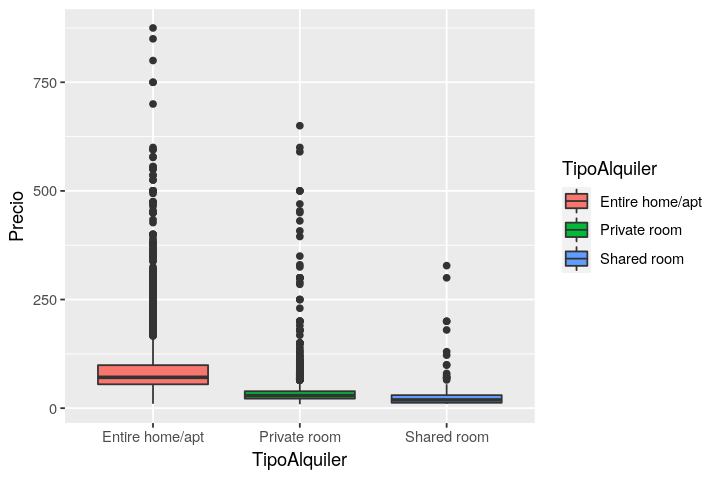

In [51]:
#13
a13 <- ggplot(airbnb, aes(
    x=TipoAlquiler, 
    y=Precio, 
    fill=TipoAlquiler)) + 
    geom_boxplot()
a13

#14
Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

TipoAlquiler,Promedio
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


[1] "------------------------------------- Shapiro-Wilk normality test"


	Shapiro-Wilk normality test

data:  precioMedioAlq$Promedio
W = 0.80711, p-value = 0.1316



	Shapiro-Wilk normality test

data:  head(airbnb$Precio[airbnb$TipoAlquiler == "Entire home/apt"], 5000)
W = 0.64959, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  head(airbnb$Precio[airbnb$TipoAlquiler == "Private room"], 5000)
W = 0.38267, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  airbnb$Precio[airbnb$TipoAlquiler == "Shared room"]
W = 0.4436, p-value < 2.2e-16


[1] "------------------------------------- Kruskal-Wallis test"


	Kruskal-Wallis rank sum test

data:  valor by tipo_habitacion
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "El p-value < 2.2, concluimos que la variable dependiente[Promedio] es muy significativa entre Tipos de Alquileres   "

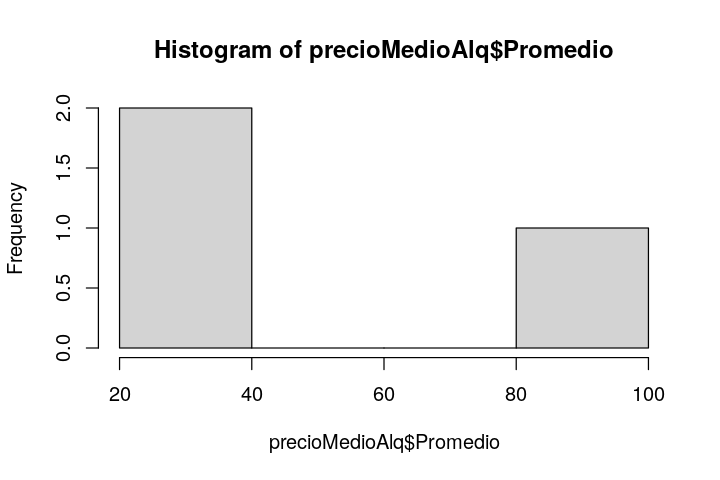

In [54]:
#14
precioMedioAlq <- airbnb %>%
  group_by(TipoAlquiler) %>%
  summarize(Promedio = mean(Precio, na.rm = T))

precioMedioAlq


paste("------------------------------------- Shapiro-Wilk normality test")

# RECHAZAMOS H0
# No se asemeja a una distribución normal, debemos utilizar Kruskal-Wallis

shapiro.test(precioMedioAlq$Promedio)
hist(precioMedioAlq$Promedio)

shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'], 5000))


shapiro.test(head(airbnb$Precio[airbnb$TipoAlquiler=='Private room'],5000))


shapiro.test(airbnb$Precio[airbnb$TipoAlquiler=='Shared room'])


paste("------------------------------------- Kruskal-Wallis test")

#kruskal.test(weight ~ group, data = my_data)

ktest <- rbind(data.frame(valor=airbnb$Precio[airbnb$TipoAlquiler=='Shared room'],tipo_habitacion='Shared room'),
               data.frame(valor=airbnb$Precio[airbnb$TipoAlquiler=='Entire home/apt'],tipo_habitacion='Entire home/apt'),
               data.frame(valor=airbnb$Precio[airbnb$TipoAlquiler=='Private room'],tipo_habitacion='Private room'))

result <- kruskal.test(valor ~ tipo_habitacion, data=ktest)
result
paste("El p-value < 2.2, concluimos que la variable dependiente[Promedio] es muy significativa entre Tipos de Alquileres   ")




#15
Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [55]:
#15
airbnb_entire <- airbnb[airbnb["TipoAlquiler"] == 'Entire home/apt',]
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<dbl>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,65.03210
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.71612


#16
¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [56]:
sort(table(airbnb_entire["Barrio"]),decreasing=T)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

#17
¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [58]:
#17
group_mean <- aggregate(Precio~Barrio, airbnb_entire, mean, na.rm=T)
group_mean[order(group_mean$Precio, decreasing = T)[1:5],]


,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


#18
¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [61]:
#18
ApPorBarrio <- airbnb_entire %>% group_by(Barrio) %>% summarize(Freq=n())

Baprnen <- merge(group_mean,ApPorBarrio, by = 'Barrio')

Baprnen[order(Baprnen$Freq, decreasing = T)[1:5],]

,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
45,Embajadores,73.70497,1228
109,Universidad,79.39674,984
76,Palacio,93.30599,769
106,Sol,100.75036,701
39,Cortes,94.39373,574


#19
Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [62]:
#19
Entradas <- Baprnen[Baprnen$Freq > 100,]

topEntradas <- head(arrange(Entradas,desc(Precio)), n = 5)

topEntradas



,Barrio,Precio,Freq
,<fct>,<dbl>,<int>
1,Recoletos,161.92537,135
2,Goya,111.33803,142
3,Sol,100.75036,701
4,Trafalgar,98.57848,223
5,Justicia,98.25468,534


#20
Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


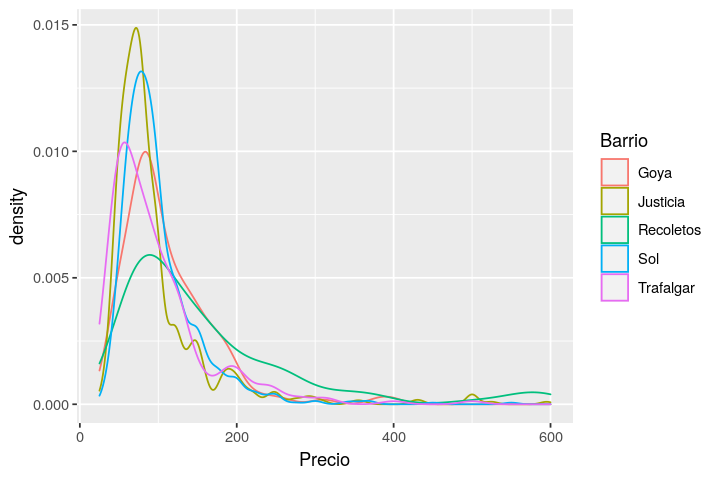

In [72]:
#20
ggplot(airbnb_entire[airbnb_entire$Barrio %in% topEntradas[,1],], aes(x=Precio, color=Barrio))+
geom_density()

#21
Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [103]:
bTop <- airbnb_entire[airbnb_entire$Barrio %in% topEntradas$Barrio,]
mtxb <- aggregate(bTop$MetrosCuadrados, list(bTop$Barrio), mean, na.rm=TRUE)
names(mtxb) <- c("Barrio","Mt2 medios")
totalbarrios <- merge(Baprnen, mtxb, by = "Barrio")
totalbarrios 

Barrio,Precio,Freq,Mt2 medios
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


#22
Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1645 rows containing non-finite values (stat_density).”


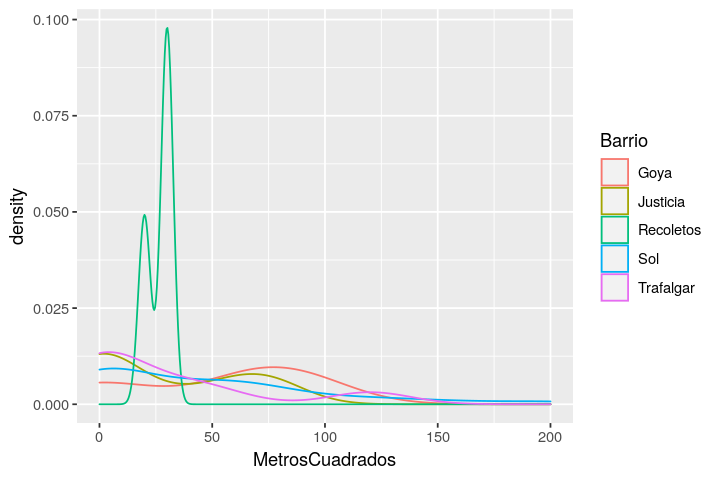

In [110]:
#22
ggplot(airbnb_entire[airbnb_entire$Barrio %in% topEntradas[,1],], aes(x=MetrosCuadrados, color=Barrio))+
geom_density()



#23
Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [116]:
#23
shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=='Goya'])
shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=='Justicia'])
shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=='Recoletos'])
shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=='Sol'])
shapiro.test(airbnb$MetrosCuadrados[airbnb$Barrio=='Trafalgar'])

#   Result
# - Goya p-value      = 0.1215    - Distribucion Normal
# - Justicia p-value  = 5.855e-05 - Distribucion NO Normal
# - Recoletos p-value = 2.2e-16   - Distribucion NO Normal
# - Sol p-value       = 4.974e-08 - Distribucion NO Normal
# - Trafalgar p-value = 0.009655  - Distribucion Normal




#TukeyHSD(x, which, ordered = FALSE, conf.level = 0.95, …)

#anova para varios grupos


#Test Bartlett para comparar varianza de dis no normales
bartlett.test(Barrios~group, data=df_group) # Comprobamos la varianza de los grupos



	Shapiro-Wilk normality test

data:  airbnb$MetrosCuadrados[airbnb$Barrio == "Goya"]
W = 0.82224, p-value = 0.1215



	Shapiro-Wilk normality test

data:  airbnb$MetrosCuadrados[airbnb$Barrio == "Justicia"]
W = 0.75479, p-value = 5.855e-05



	Shapiro-Wilk normality test

data:  airbnb$MetrosCuadrados[airbnb$Barrio == "Recoletos"]
W = 0.75, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  airbnb$MetrosCuadrados[airbnb$Barrio == "Sol"]
W = 0.80374, p-value = 4.974e-08



	Shapiro-Wilk normality test

data:  airbnb$MetrosCuadrados[airbnb$Barrio == "Trafalgar"]
W = 0.78548, p-value = 0.009655


ERROR: Error in eval(m$data, parent.frame()): object 'df_group' not found


In [ ]:
3

#24
Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [ ]:
#24

#25
Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [ ]:
#25

#26
Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


In [ ]:
#26

#27
Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [ ]:
#27

#28
¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [ ]:
#28

#29
Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [ ]:
#29

#30
Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [ ]:
#30

#31
¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [ ]:
#31